**Heart diseases data preprocessing and EDA**

Importing libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm, ttest_ind, chi2_contingency
import seaborn as sns
import warnings
import sqlite3


General settings

In [2]:
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

Data aquisition from database

In [3]:
db_name = './Data/db_heart_disease.db'
conn = sqlite3.connect(db_name)

query = 'SELECT * FROM tbl_observations;'
df = pd.read_sql_query(query, conn)

conn.close()

Checking what's in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   object 
 5   BPMeds           4240 non-null   object 
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   object 
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   object 
 13  heartRate        4240 non-null   object 
 14  glucose          4240 non-null   object 
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 530.1+ KB


In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.1,85,85,0


In [6]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2,1,20,NA,0,0,0,248,131.0,72.0,22,84,86,0
4236,0,44,1,1,15,0,0,0,0,210,126.5,87.0,19.16,86,NA,0
4237,0,52,2,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107,0
4238,1,40,3,0,0,0,0,1,0,185,141.0,98.0,25.6,67,72,0
4239,0,39,3,1,30,0,0,0,0,196,133.0,86.0,20.91,85,80,0


**Data preprocessing**

Reneming 'male' column

In [7]:
df.rename(columns={'male': 'sex'}, inplace=True)

Data types conversion and missing values analysis:
- Some data types are incorrect (object) and they will be recoded into int/float type.
- Missing data for categorical variables will be replaced with modes, and for numerical variables with medians.

In [8]:
for column in df.columns:
    print(f'Unique values in column: {column}:')
    print(df[column].unique())
    print('-' * 40)

Unique values in column: sex:
[1 0]
----------------------------------------
Unique values in column: age:
[39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
----------------------------------------
Unique values in column: education:
['4' '2' '1' '3' 'NA']
----------------------------------------
Unique values in column: currentSmoker:
[0 1]
----------------------------------------
Unique values in column: cigsPerDay:
[0 20 30 23 15 9 10 5 35 43 1 40 3 2 'NA' 12 4 18 25 60 14 45 8 50 13 11 7
 6 38 29 17 16 19 70]
----------------------------------------
Unique values in column: BPMeds:
['0' '1' 'NA']
----------------------------------------
Unique values in column: prevalentStroke:
[0 1]
----------------------------------------
Unique values in column: prevalentHyp:
[0 1]
----------------------------------------
Unique values in column: diabetes:
[0 1]
----------------------------------------
Unique values in column:

In [9]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].replace('NA', np.nan)
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [11]:
# Calculate missing values for each column
missing_values = df.isna().sum()
print('Missing values in each attribute:')
print(missing_values)

# Calculate the total percentage of missing values in the dataset
total_percentage_mv = (missing_values.sum() / df.shape[0]) * 100
print('\nTotal % of missing values in the dataset:')
print(f'{round(total_percentage_mv, 2)} %')


Missing values in each attribute:
sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total % of missing values in the dataset:
15.21 %


Missing values imputation

In [12]:
# Missing values imputation with mode for categorical features (education and BPMeds)
for column in ['education', 'BPMeds']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Missing values imputation with median for numerical attribute 
for column in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    df[column].fillna(df[column].median(), inplace=True)

print(df.isnull().sum())

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [13]:
df.shape

(4240, 16)

Checking duplicates

In [14]:
df.duplicated().sum()

0

**Exploratory Data Analysis**

In [15]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Target variable analysis:
- The dataset contains 4240 cases, of which 3596 do not belong to the group at risk of coronary heart disease, while 644 do.
- Therefore, the dataset exhibits an imbalance in the target variable categories

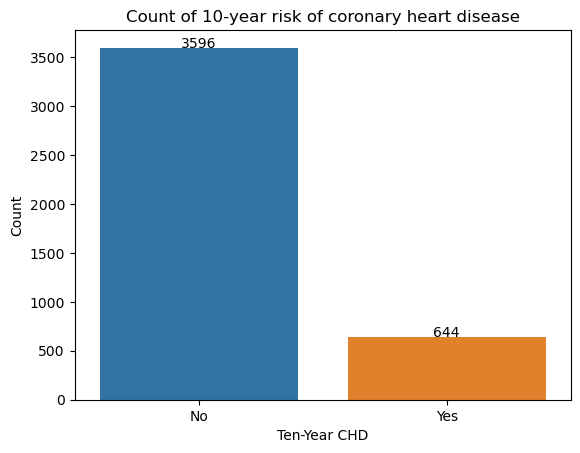

In [16]:

df['TenYearCHD_plot'] = df['TenYearCHD'].map({0: 'No', 1: 'Yes'})

ax = sns.countplot(x='TenYearCHD_plot', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10)

plt.title('Count of 10-year risk of coronary heart disease')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Count')

plt.show()


Categorical features analysis

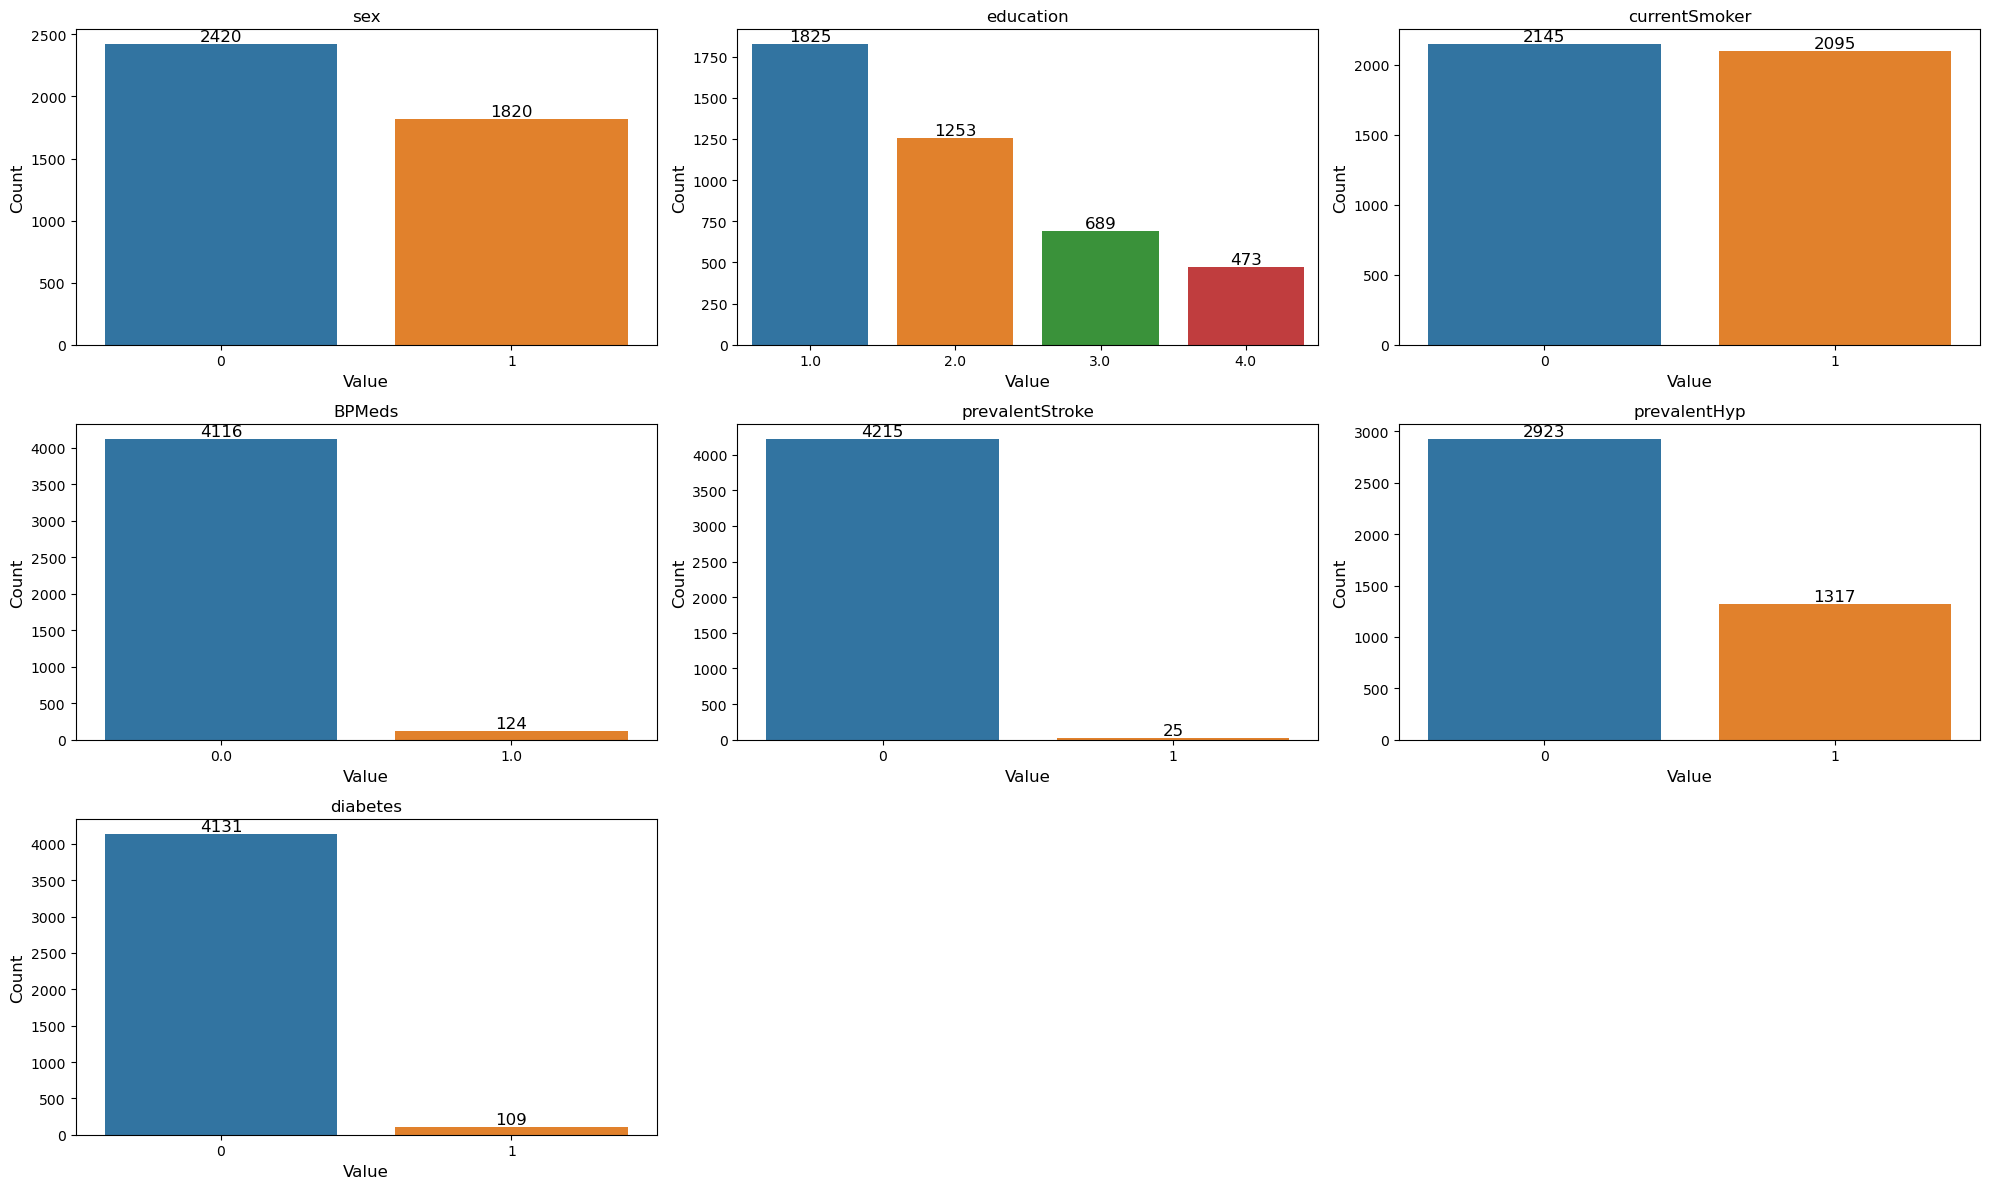

In [17]:
# Count bar chart grid for each variable to examine outliers, error data values and feature distribution

# Categorical columns list
cat_columns = [col for col in df.columns if col in ['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]

# Chart grid settings
n_cols = 3  
n_rows = int(np.ceil(len(cat_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating plots
for i, col in enumerate(cat_columns):
    # Liczebność dla każdej wartości (0/1)
    count_data = df[col].value_counts()
    sns.barplot(
        x=count_data.index,
        y=count_data.values,
        ax=axes[i],  
    )
    # Labels
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Value", fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha="center", va="bottom", fontsize=12)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


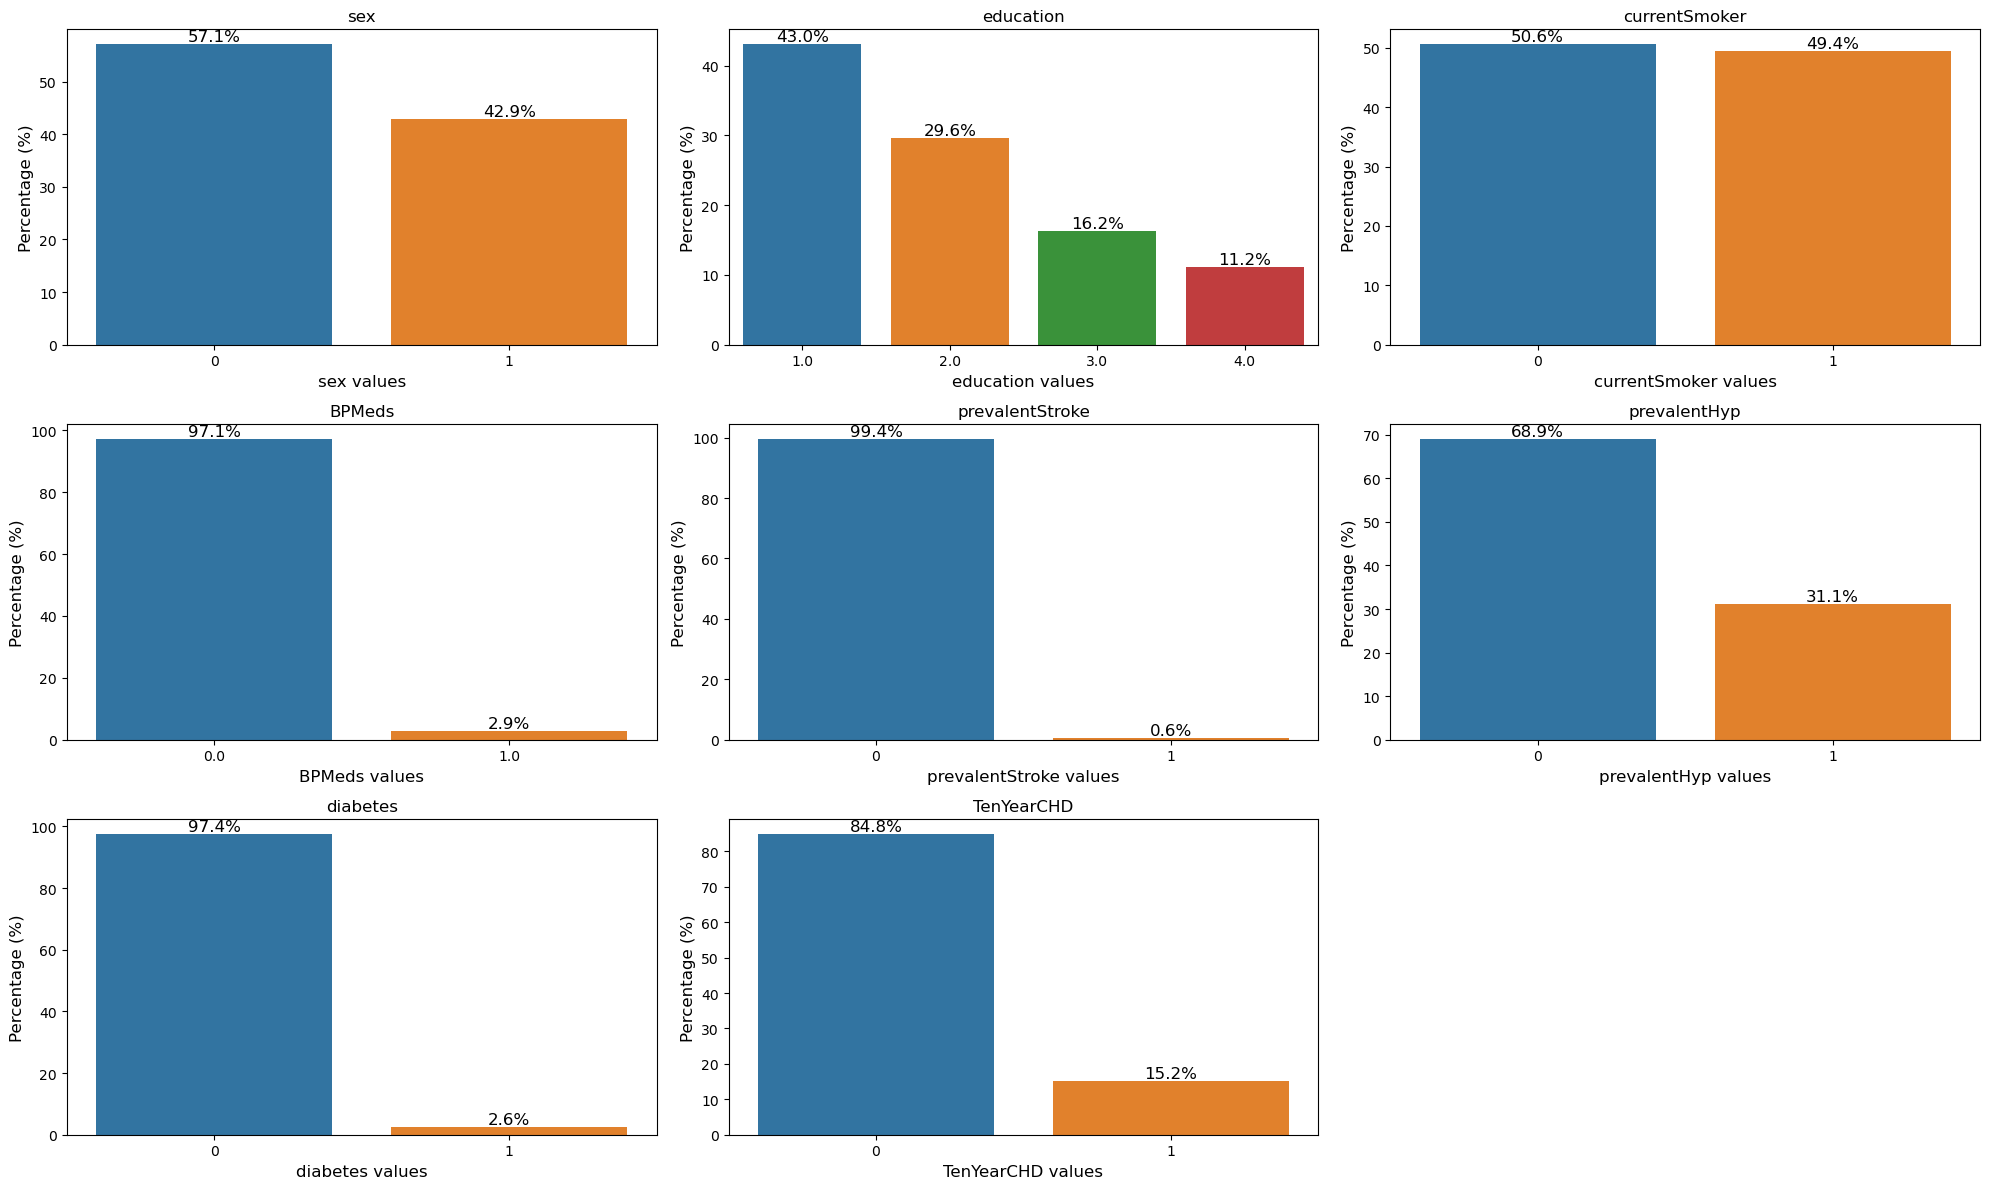

In [18]:
# % bar chart grid for each variable to examine outliers, error data values and feature distribution

# Intiger columns list 
cat_columns = [col for col in df.columns if col in ['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']]


# Chart grid settings
n_cols = 3  
n_rows = int(np.ceil(len(cat_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating plots
for i, col in enumerate(cat_columns):
    # % for each value (0/1)
    percent_data = df[col].value_counts(normalize=True) * 100
    sns.barplot(
        x=percent_data.index,
        y=percent_data.values,
        ax=axes[i],
    )
    # Labels
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel(f"{col} values", fontsize=12)
    axes[i].set_ylabel("Percentage (%)", fontsize=12)
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.1f}%", 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha="center", va="bottom", fontsize=12)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In four categorical variables, there are significant discrepancies in the distribution of values. For example, only 25 people (0.6%) have had a stroke in the past, 124 people (2.9%) take blood pressure medication, and 109 people (2.6%) have been diagnosed with diabetes. This indicates that these variables may have low predictive value. On the other hand, if, for example, stroke is a strong predictor of heart disease, even a small number of cases can provide valuable information. It all depends on the specificity of the data and the purpose of the analysis.

In [19]:
for column in cat_columns:
    # Create the crosstab with numeric values
    crosstab = pd.crosstab(df['TenYearCHD'], df[column], margins=True, margins_name='Total')
    
    # Create the crosstab with percentage values
    crosstab_percentage = crosstab.div(crosstab.loc['Total'], axis=1) * 100
    crosstab_percentage = crosstab_percentage.applymap(lambda x: f'{x:.2f}%')
    
    # Print the title and numeric crosstab
    print(f'Crosstab for {column}')
    print(crosstab)
    
    # Print the title and percentage crosstab
    print(f'\nPercentage Crosstab for {column}')
    print(crosstab_percentage)
    
    # For better readability
    print('\n' + '='*50 + '\n')


Crosstab for sex
sex            0     1  Total
TenYearCHD                   
0           2119  1477   3596
1            301   343    644
Total       2420  1820   4240

Percentage Crosstab for sex
sex               0        1    Total
TenYearCHD                           
0            87.56%   81.15%   84.81%
1            12.44%   18.85%   15.19%
Total       100.00%  100.00%  100.00%


Crosstab for education
education    1.0   2.0  3.0  4.0  Total
TenYearCHD                             
0           1486  1106  601  403   3596
1            339   147   88   70    644
Total       1825  1253  689  473   4240

Percentage Crosstab for education
education       1.0      2.0      3.0      4.0    Total
TenYearCHD                                             
0            81.42%   88.27%   87.23%   85.20%   84.81%
1            18.58%   11.73%   12.77%   14.80%   15.19%
Total       100.00%  100.00%  100.00%  100.00%  100.00%


Crosstab for currentSmoker
currentSmoker     0     1  Total
TenYearCHD  

**Interpretation of Crosstab Results**

Sex

- Distribution: Among individuals with no coronary heart disease (CHD), 87.56% are female (sex=0) and 81.15% are male (sex=1).

- Observation: The percentage of individuals with CHD is higher among males (18.85%) compared to females (12.44%).

- Conclusion: Sex appears to be a factor, with males having a higher risk of developing CHD.

Education

- Distribution: For individuals with no CHD, the percentage decreases as the education level increases (81.42% for education level 1 to 85.20% for level 4).

- Observation: The highest CHD risk is observed in individuals with the lowest education level (18.58% for education level 1).

- Conclusion: Lower education levels may be associated with higher CHD risk.

CurrentSmoker

- Distribution: Both non-smokers and smokers have a similar percentage of individuals with no CHD (85.50% and 84.11% respectively).

- Observation: The CHD risk is slightly higher among smokers (15.89%) than non-smokers (14.50%).

- Conclusion: Smoking is associated with a marginally higher risk of CHD.

BPMeds

- Distribution: The majority of individuals with no CHD do not take blood pressure medications (85.35%).

- Observation: The CHD risk is significantly higher among those taking blood pressure medications (33.06%) compared to those who do not (14.65%).

- Conclusion: Taking blood pressure medications may indicate higher CHD risk, possibly due to existing hypertension issues.

PrevalentStroke

- Distribution: A small number of individuals with no CHD have had a stroke (56.00%).

- Observation: The CHD risk is much higher among those who have had a stroke (44.00%).

- Conclusion: A history of stroke is a strong predictor of higher CHD risk.

PrevalentHyp (Hypertension)

- Distribution: A higher percentage of individuals with no CHD do not have hypertension (89.09%) compared to those with hypertension (75.32%).

- Observation: The CHD risk is higher among individuals with hypertension (24.68%) compared to those without (10.91%).

- Conclusion: Hypertension is associated with an increased risk of CHD.

Diabetes

- Distribution: The majority of individuals with no CHD do not have diabetes (85.38%).

- Observation: The CHD risk is higher among individuals with diabetes (36.70%) compared to those without (14.62%).

- Conclusion: Diabetes is a strong predictor of higher CHD risk.

These crosstabs provide valuable insights into the relationships between various predictors and the risk of developing CHD. Some variables, like sex, education level, smoking status, blood pressure medication use, stroke history, hypertension, and diabetes, show significant associations with CHD risk. This information can help guide feature selection for predictive modeling.



In [20]:

# Function for Cramer's V coefficient
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * min(dof[0], dof[1])))

# Create contingency tables and calculate chi-square, p-value, and Cramér's V
for col in cat_columns:
    # Create the contingency table
    contingency_table = pd.crosstab(df['TenYearCHD'], df[col])
    
    # Perform chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()  # total number of observations
    cramer_v = cramers_v(chi2, n, (contingency_table.shape[0] - 1, contingency_table.shape[1] - 1))
    
    # Print results
    print(f'Chi-square test for {col}:')
    print(f'  Chi-square statistic = {chi2:.2f}')
    print(f'  p-value = {p:.2f}')
    print(f'  Cramér\'s V = {cramer_v:.2f}')
    print('\n' + '='*50 + '\n')



Chi-square test for sex:
  Chi-square statistic = 32.62
  p-value = 0.00
  Cramér's V = 0.09


Chi-square test for education:
  Chi-square statistic = 31.05
  p-value = 0.00
  Cramér's V = 0.09


Chi-square test for currentSmoker:
  Chi-square statistic = 1.50
  p-value = 0.22
  Cramér's V = 0.02


Chi-square test for BPMeds:
  Chi-square statistic = 30.27
  p-value = 0.00
  Cramér's V = 0.08


Chi-square test for prevalentStroke:
  Chi-square statistic = 14.03
  p-value = 0.00
  Cramér's V = 0.06


Chi-square test for prevalentHyp:
  Chi-square statistic = 132.46
  p-value = 0.00
  Cramér's V = 0.18


Chi-square test for diabetes:
  Chi-square statistic = 38.48
  p-value = 0.00
  Cramér's V = 0.10


Chi-square test for TenYearCHD:
  Chi-square statistic = 4232.24
  p-value = 0.00
  Cramér's V = 1.00




- Sex: There is a statistically significant but weak association between sex and TenYearCHD.

- Education: There is a statistically significant but weak association between education level and TenYearCHD.

- CurrentSmoker: There is no statistically significant association between smoking status and TenYearCHD.

- BPMeds: There is a statistically significant but weak association between taking blood pressure medications and TenYearCHD.

- PrevalentStroke: There is a statistically significant but weak association between having had a stroke and TenYearCHD.

- PrevalentHyp (Hypertension): There is a statistically significant and moderate association between hypertension and TenYearCHD.

- Diabetes: There is a statistically significant but weak association between diabetes and TenYearCHD.

- TenYearCHD: As expected, there is a perfect association between the variable TenYearCHD and itself, confirming data integrity.

Significant Variables: Sex, education, blood pressure medication use, stroke history, hypertension, and diabetes all show statistically significant associations with TenYearCHD.

Strongest Predictor: Hypertension (prevalentHyp) shows the strongest association with CHD risk, indicated by a higher Cramér's V value.

No Significant Association: Smoking status (currentSmoker) does not show a statistically significant association with CHD risk.

Numerical features analysis

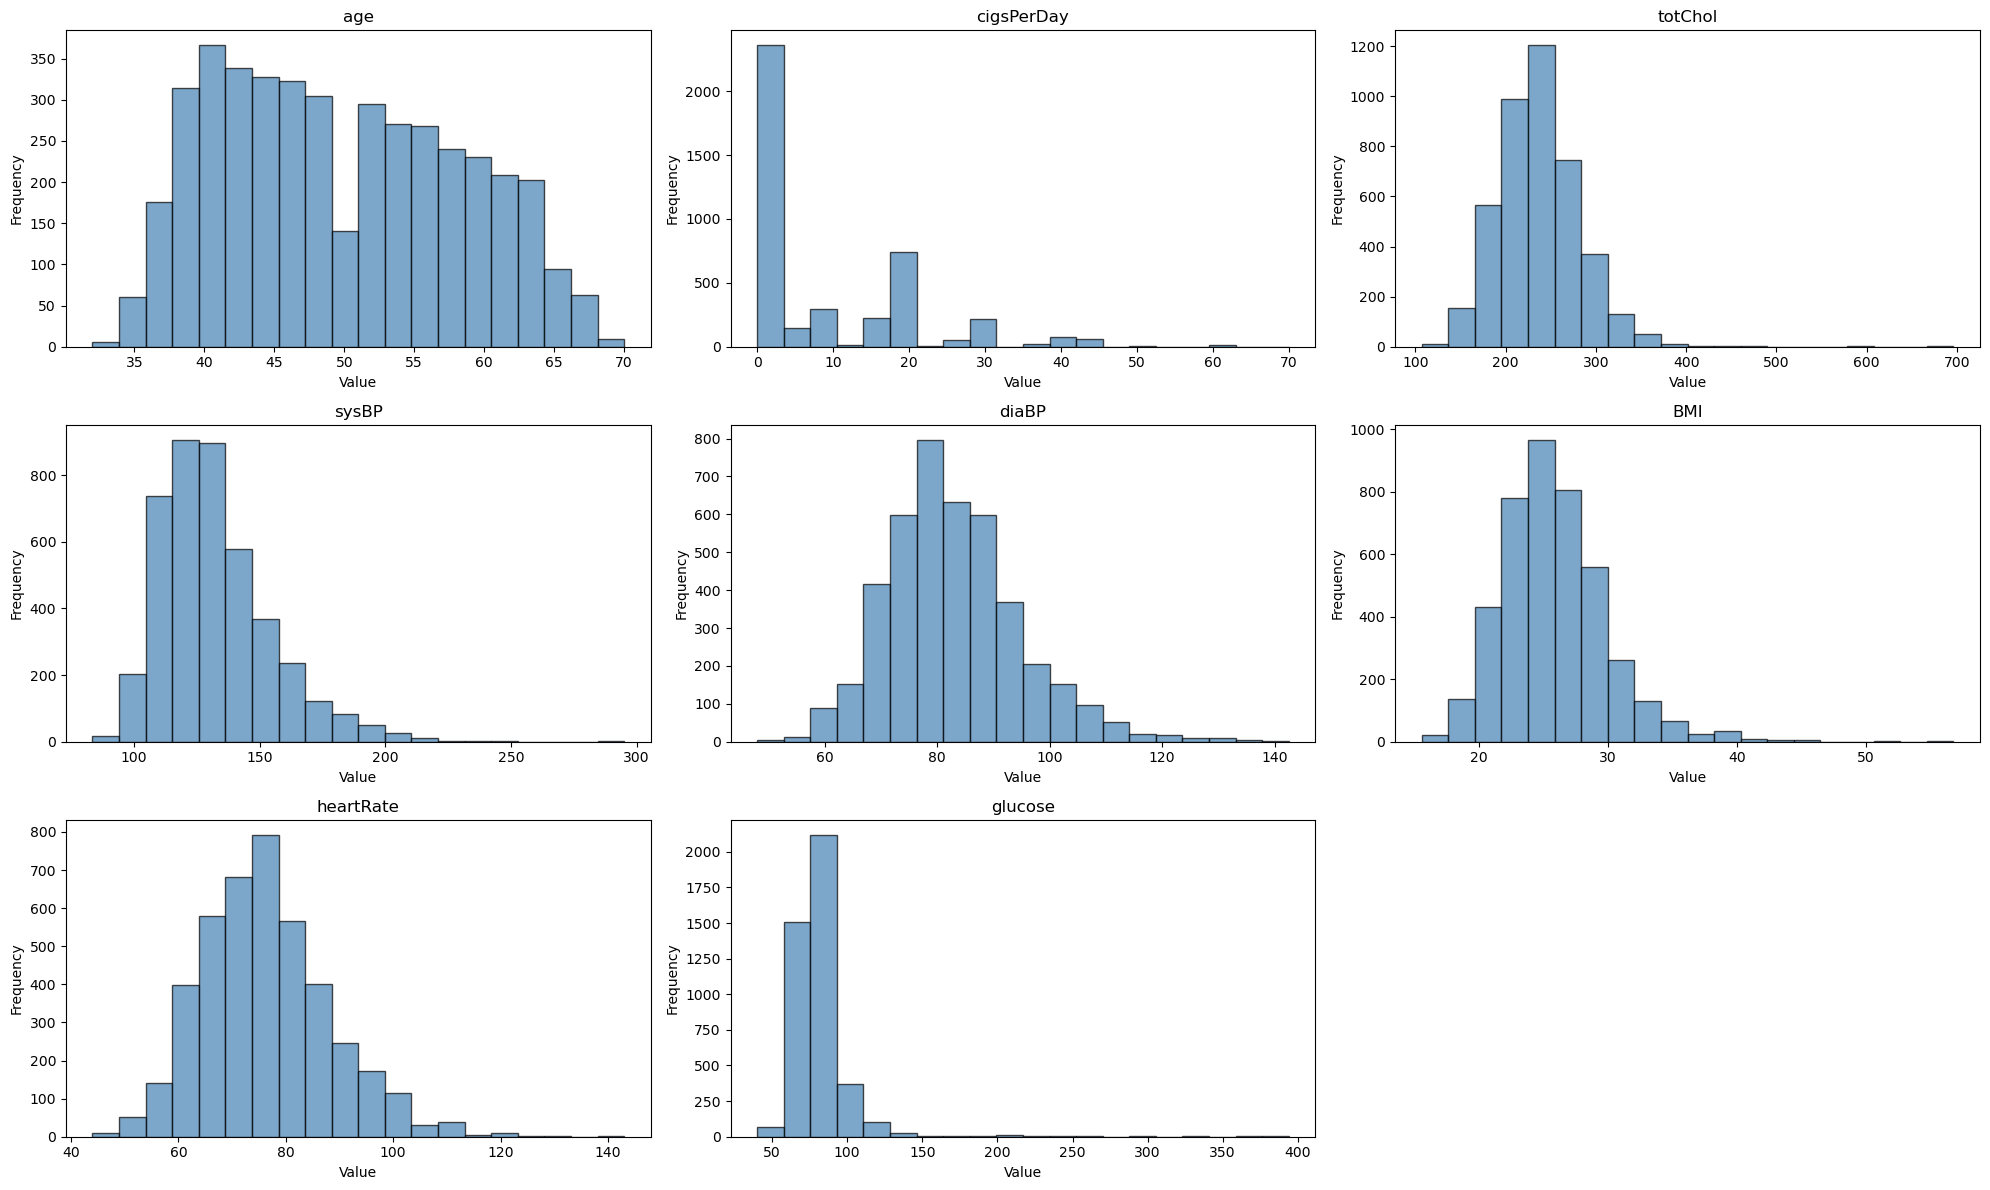

In [21]:
# Histograms grid for each numeric variable (with frequencies on y-axis)
# List of numerical columns
num_columns = [col for col in df.columns if col in ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Chart grid settings
n_cols = 3  
n_rows = int(np.ceil(len(num_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating histograms
for i, col in enumerate(num_columns):
    axes[i].hist(df[col], bins=20, color="steelblue", edgecolor="black", alpha=0.7)
    
    # Labels
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(len(num_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

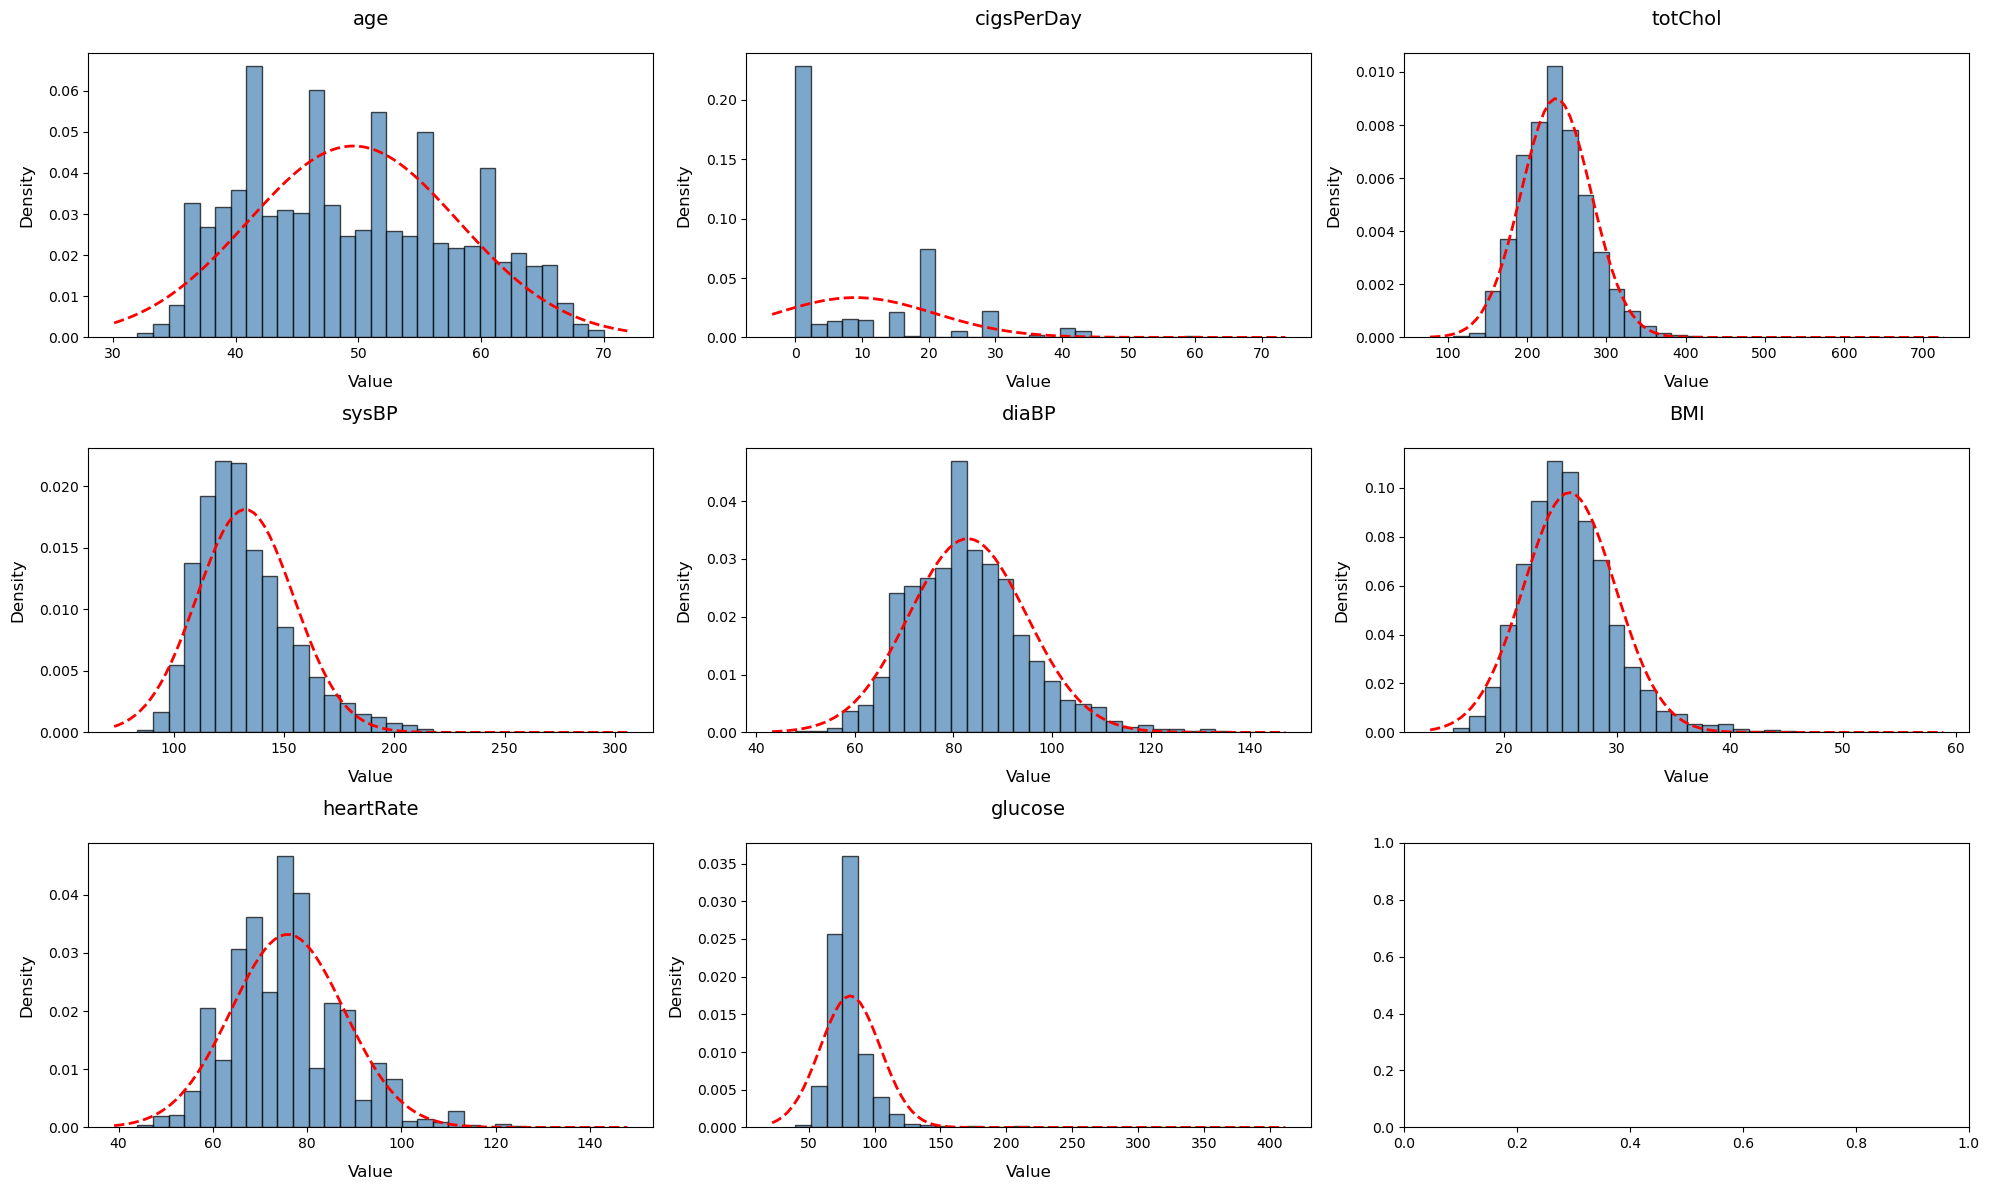

In [22]:
# Histograms grid for each numeric variable with normal distribution line to examine distribution shape (with density on y-axis)
# List of numerical columns
num_columns = [col for col in df.columns if col in ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# Chart grid settings
n_cols = 3  
n_rows = int(np.ceil(len(num_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Generating histograms and adding normal distribution lines
for i, col in enumerate(num_columns):
    # Histogram
    n, bins, patches = axes[i].hist(df[col], bins=30, color="steelblue", edgecolor="black", alpha=0.7, density=True)
    
    # Normal distribution parameters
    mu, std = norm.fit(df[col])
    
    # Normal distribution lines
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'r--', linewidth=2)
    
    # Labels
    axes[i].set_title(f"{col}", fontsize=14, pad=20)
    axes[i].set_xlabel("Value", fontsize=12, labelpad=10)
    axes[i].set_ylabel("Density", fontsize=12, labelpad=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [23]:
# Calculate skewness and kurtosis for numeric columns
for col in num_columns:
    skewness = skew(df[col])
    kurt = kurtosis(df[col])  
    print(f'Skewness and kurtosis value for {col}:')
    print(f'\nSkewness: {skewness:.2f}')
    print(f'Kurtosis: {kurt:.2f}')
    print('='*50)


Skewness and kurtosis value for age:

Skewness: 0.23
Kurtosis: -0.99
Skewness and kurtosis value for cigsPerDay:

Skewness: 1.26
Kurtosis: 1.04
Skewness and kurtosis value for totChol:

Skewness: 0.88
Kurtosis: 4.21
Skewness and kurtosis value for sysBP:

Skewness: 1.14
Kurtosis: 2.15
Skewness and kurtosis value for diaBP:

Skewness: 0.71
Kurtosis: 1.27
Skewness and kurtosis value for BMI:

Skewness: 0.99
Kurtosis: 2.68
Skewness and kurtosis value for heartRate:

Skewness: 0.64
Kurtosis: 0.91
Skewness and kurtosis value for glucose:

Skewness: 6.54
Kurtosis: 64.91


Based on histograms and skeweness/kurtosis values we can conclude that:

- Age: Age data is fairly symmetrical but has fewer outliers, indicating a flatter distribution.

- CigsPerDay: The number of cigarettes smoked per day is skewed to the right, with more people smoking fewer cigarettes, but there are some heavy smokers. The distribution has a sharper peak than normal.

- TotChol (Total Cholesterol): Total cholesterol levels are skewed to the right, indicating more people have lower cholesterol levels, but there are some with very high levels. The distribution is sharply peaked with more outliers.

- SysBP (Systolic Blood Pressure): Systolic blood pressure is right-skewed, showing that more individuals have lower blood pressure levels, but there are some with very high levels. The distribution has a sharper peak and more outliers than normal.

- DiaBP (Diastolic Blood Pressure): Diastolic blood pressure is right-skewed, indicating more people have lower levels, but there are some with higher levels. The distribution has a sharper peak and more outliers than normal.

- BMI (Body Mass Index): BMI is right-skewed, showing more individuals with lower BMI, but some with very high BMI. The distribution is sharply peaked with more outliers.

- HeartRate: Heart rate is slightly skewed to the right, with more individuals having lower heart rates, but the distribution is close to normal.

- Glucose: Glucose levels are highly right-skewed, indicating most people have lower glucose levels, but there are some with extremely high levels. The distribution has an extremely sharp peak with many outliers, suggesting significant deviations from normality.

These results indicate that most of the numeric variables are positively skewed, meaning they have longer tails on the right side of the distribution. It also means that most values are lower than the mean of this variable. The mean is 'pulled' upward by a few large values on the right side of the distribution.  Additionally variables like glucose show extreme skewness and kurtosis, suggesting the presence of significant outliers and deviations from normality. Adjustments or transformations may be needed for better modeling performance.

In [24]:
num_columns_df = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

cat_columns_df = df[['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]

target_column_df = df['TenYearCHD']

In [31]:
# Pearson correlation coefficients matrix
correlation_matrix = num_columns_df.corr(method='pearson')
correlation_matrix

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.192017,0.260527,0.394053,0.205586,0.135470,-0.012868,0.117878
cigsPerDay,-0.192017,1.000000,-0.027134,-0.088393,-0.056768,-0.092647,0.074258,-0.056792
totChol,0.260527,-0.027134,1.000000,0.207350,0.163408,0.115035,0.090541,0.045677
sysBP,0.394053,-0.088393,0.207350,1.000000,0.783952,0.325087,0.182052,0.135091
diaBP,0.205586,-0.056768,0.163408,0.783952,1.000000,0.376396,0.181023,0.058899
BMI,0.135470,-0.092647,0.115035,0.325087,0.376396,1.000000,0.067293,0.082228
heartRate,-0.012868,0.074258,0.090541,0.182052,0.181023,0.067293,1.000000,0.087362
glucose,0.117878,-0.056792,0.045677,0.135091,0.058899,0.082228,0.087362,1.000000


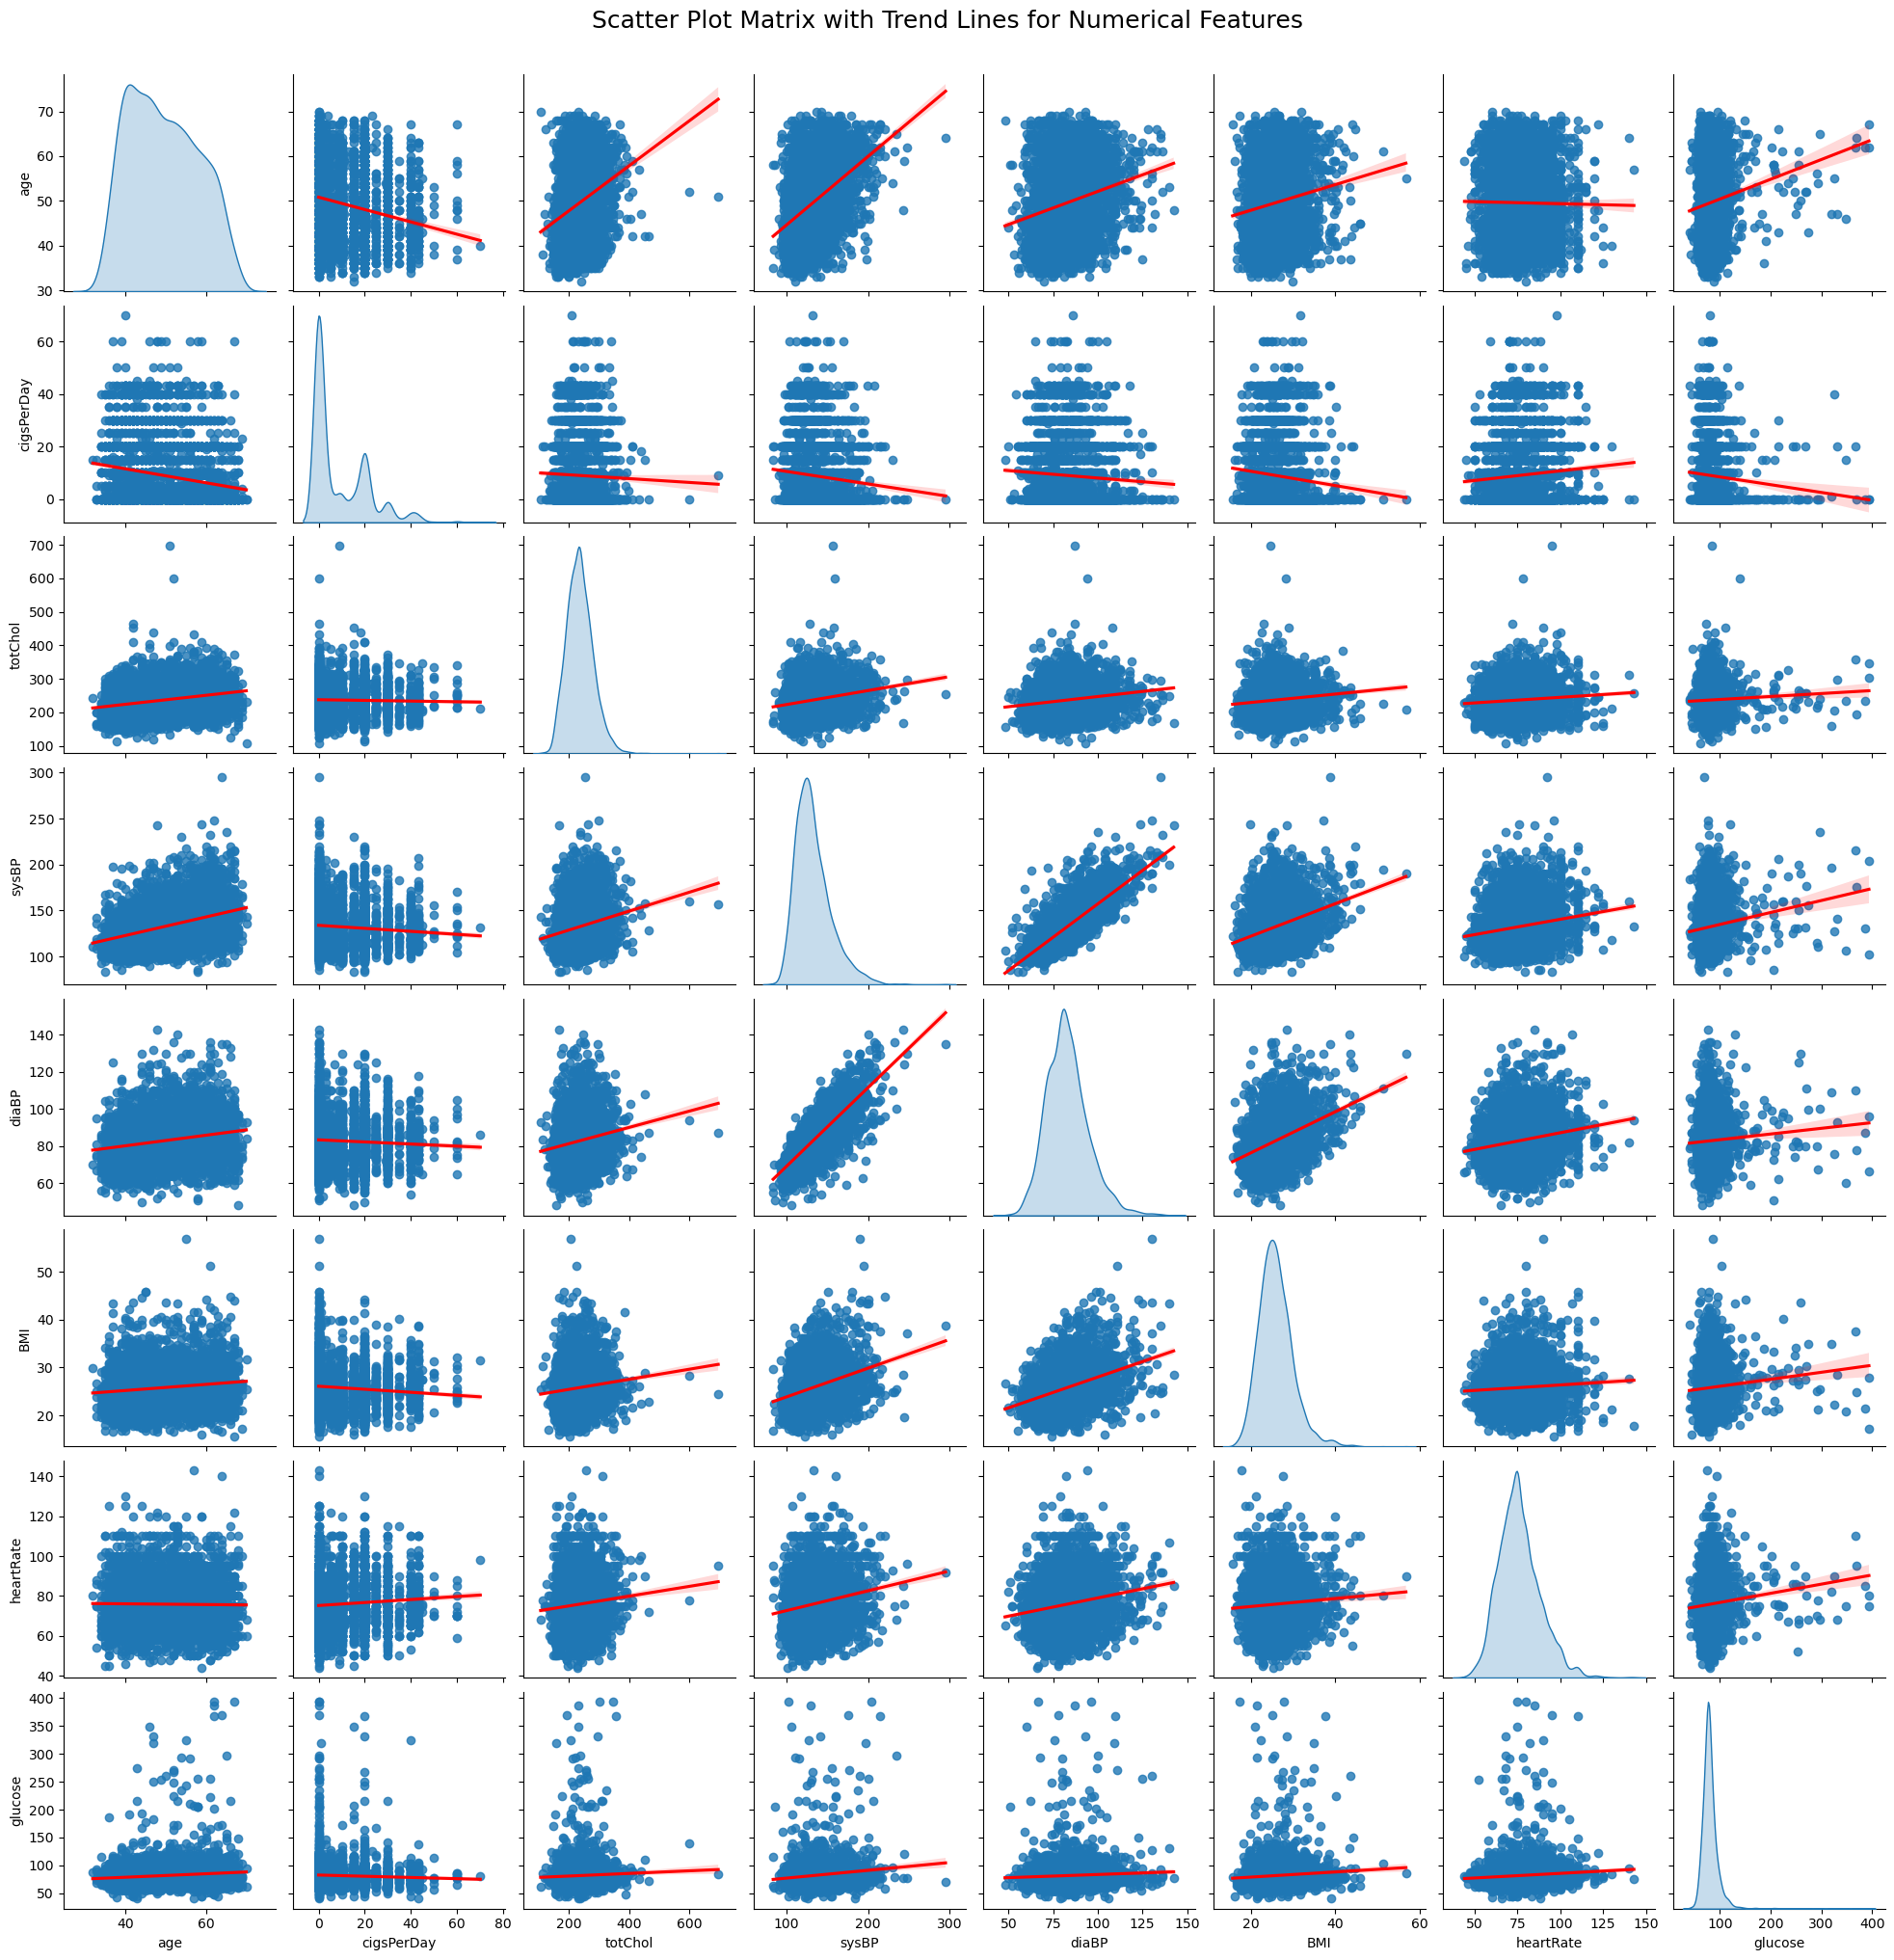

In [27]:
# Scatter plot matrix with trend lines
sns.pairplot(num_columns_df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

# Adding a title to the entire scatter plot matrix
plt.suptitle('Scatter Plot Matrix with Trend Lines for Numerical Features', fontsize=18, y=1.02)

plt.show()


Age:

- Positively correlated with total cholesterol (0.26), systolic BP (0.39), and diastolic BP (0.21).

- Indicates that as age increases, these variables also tend to increase.

CigsPerDay:

- Negatively correlated with age (-0.19), indicating younger individuals tend to smoke more.

- Correlation values are generally low, suggesting weak relationships with other variables.

TotChol (Total Cholesterol):

- Positively correlated with age (0.26), systolic BP (0.21), and diastolic BP (0.16).

- Indicates higher cholesterol levels are associated with higher blood pressure and older age.

SysBP (Systolic Blood Pressure):

- Strongly positively correlated with diastolic BP (0.78).

- Moderate positive correlations with age (0.39) and BMI (0.33).

- Indicates that higher systolic BP is associated with higher diastolic BP, older age, and higher BMI.

DiaBP (Diastolic Blood Pressure):

- Strongly positively correlated with systolic BP (0.78).

- Moderate positive correlations with BMI (0.38) and age (0.21).

- Indicates that higher diastolic BP is associated with higher systolic BP, higher BMI, and older age.

BMI (Body Mass Index):

- Positively correlated with systolic BP (0.33) and diastolic BP (0.38).

- Indicates that higher BMI is associated with higher blood pressure levels.

HeartRate:

- Generally low correlation values with other variables, indicating weak relationships.

Glucose:

- Generally low correlation values with other variables, indicating weak relationships.

Overall, there are some moderate to strong correlations, especially between systolic and diastolic blood pressure. Age shows a positive relationship with blood pressure and cholesterol levels, suggesting these factors increase with age. Other variables, like heart rate and glucose, have generally weak correlations with the other features.

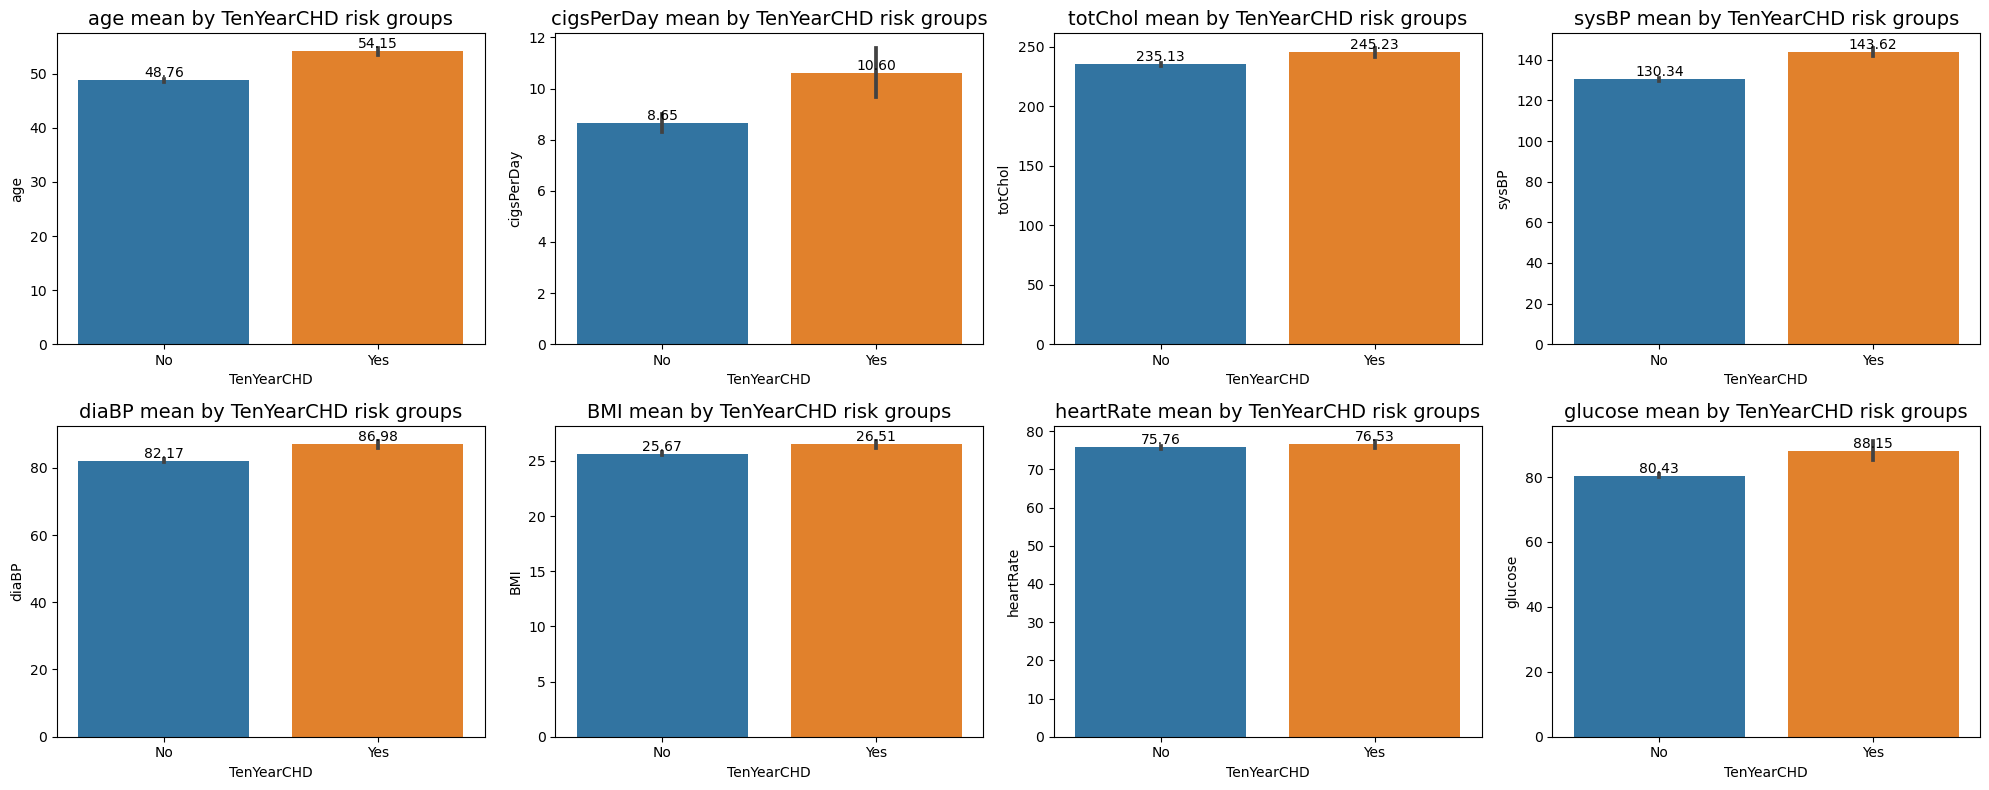

In [28]:
# Replace 'TenYearCHD' category labels with 'Yes' and 'No' for plotting purposes
df['TenYearCHD_plot'] = df['TenYearCHD'].map({0: 'No', 1: 'Yes'})

# Mean bar chart grid for each variable to examine differences between 10-year risk of coronary heart disease groups
n_cols = 4 
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  

for i, col in enumerate(num_columns):
    sns.barplot(
        x='TenYearCHD_plot', 
        y=col, 
        data=df, 
        ax=axes[i], 
        ci=95  
    )
    # Add mean values on the bars with two decimal places
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha='center', va='bottom', fontsize=10)
    
    axes[i].set_title(f'{col} mean by TenYearCHD risk groups', fontsize=14)
    axes[i].set_xlabel('TenYearCHD')
    axes[i].set_ylabel(col)

# Hide empty axes (if variables are less than n_rows * n_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [29]:
# Mapping 'TenYearCHD' labels to 'Yes' and 'No'
df['TenYearCHD_plot'] = df['TenYearCHD'].map({0: 'No', 1: 'Yes'})

# Initialize list for results
ttest_results = []

# Performing t-Student test
for col in num_columns:
    # Splitting data into two groups
    group1 = df[df['TenYearCHD'] == 0][col]
    group2 = df[df['TenYearCHD'] == 1][col]
    
    # Conducting t-Student test
    t_stat, p_val = ttest_ind(group1, group2)
    
    # Storing results along with means
    ttest_results.append({
        'Variable': col, 
        'Mean (No CHD)': round(group1.mean(), 2), 
        'Mean (Yes CHD)': round(group2.mean(), 2),
        't-statistic': t_stat, 
        'p-value': f'{p_val:.2f}'
    })

# Converting results to DataFrame
ttest_df = pd.DataFrame(ttest_results)

# Displaying results
print(ttest_df)



     Variable  Mean (No CHD)  Mean (Yes CHD)  t-statistic p-value
0         age          48.76           54.15   -15.061646    0.00
1  cigsPerDay           8.65           10.60    -3.829891    0.00
2     totChol         235.13          245.23    -5.339733    0.00
3       sysBP         130.34          143.62   -14.427703    0.00
4       diaBP          82.17           86.98    -9.547814    0.00
5         BMI          25.67           26.51    -4.852015    0.00
6   heartRate          75.76           76.53    -1.487971    0.14
7     glucose          80.43           88.15    -7.956603    0.00


- Age: Age is significantly higher in individuals with CHD compared to those without. The difference is statistically significant.

- CigsPerDay: The number of cigarettes smoked per day is significantly higher in individuals with CHD. This difference is statistically significant.

- TotChol (Total Cholesterol): Total cholesterol levels are significantly higher in individuals with CHD. The difference is statistically significant.

- SysBP (Systolic Blood Pressure): Systolic blood pressure is significantly higher in individuals with CHD. The difference is statistically significant.

- DiaBP (Diastolic Blood Pressure): Diastolic blood pressure is significantly higher in individuals with CHD. The difference is statistically significant.

- BMI (Body Mass Index): BMI is significantly higher in individuals with CHD. The difference is statistically significant.

- HeartRate: There is no statistically significant difference in heart rate between individuals with and without CHD.

- Glucose: Glucose levels are significantly higher in individuals with CHD. The difference is statistically significant.

These results indicate that variables such as age, cigarettes per day, total cholesterol, systolic blood pressure, diastolic blood pressure, BMI, and glucose are significantly higher in individuals with CHD. The heart rate, however, does not show a statistically significant difference.

The largest absolute t-statistic values for the variables age and sysBP indicate that these variables show relatively the greatest differences between the means in the groups at risk and not at risk of developing coronary heart disease. This means that these variables have the greatest impact on the difference between these two groups and are strongly associated with the occurrence of the disease.